In [1]:
#What is our goal? : Can you predict whether a viewer will rate a movies positively or negatively? Use the viewer ratings data to create a machine learning model that can predict whether a viewer will rate a movie positively or negatively

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [69]:
BestShows = pd.read_csv("C:/Users/lesle/Desktop/Best Shows Netflix.csv")

In [70]:
BestShows.head(5)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US


In [8]:
#recoding score
def Rating (series):
  if series == "SCORE":
    return "0"
  if series <= 6.9: 
    return "Negative"
  if series >= 7: 
    return "Positive"
BestMovies["Rating"] = BestMovies["SCORE"].apply(Rating)

In [9]:
BestMovies.head(5)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION,Rating
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US,Positive
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US,Positive
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB,Positive
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN,Positive
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US,Positive


In [15]:
#Descriptive info about the BestShows

In [71]:
BestShows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              246 non-null    int64  
 1   TITLE              246 non-null    object 
 2   RELEASE_YEAR       246 non-null    int64  
 3   SCORE              246 non-null    float64
 4   NUMBER_OF_VOTES    246 non-null    int64  
 5   DURATION           246 non-null    int64  
 6   NUMBER_OF_SEASONS  246 non-null    int64  
 7   MAIN_GENRE         246 non-null    object 
 8   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 17.4+ KB


In [17]:
#What are we looking at? https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [18]:
#Exploring the variables

In [72]:
BestShows.SCORE.describe()

count    246.000000
mean       8.093496
std        0.449261
min        7.500000
25%        7.700000
50%        8.000000
75%        8.400000
max        9.500000
Name: SCORE, dtype: float64

In [20]:
#Histogram of scores to visualize the distriubution

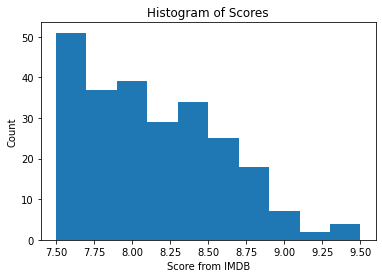

In [73]:
plt.hist(BestShows['SCORE'])
plt.xlabel('Score from IMDB')
plt.ylabel('Count')
plt.title('Histogram of Scores')
plt.show()

In [22]:
#Thoughts -- Most scores in the dataset are around 7.5, but this is also the lowest the scores go. This would mean that there would be shows that exist outside of the dataset that represent the other side of the histogram.

In [23]:
#What happens at the 7.5 mark?
#How do I see a histogram at that mark in more detail?
#We could then reasonably predict that most scores would be in the mean?

In [24]:
#lets take a look at the genre spread

In [ ]:
#Covnert genre from object to string 

In [75]:
BestShows['MAIN_GENRE'] = BestShows['MAIN_GENRE'].astype(str)                           

Text(0.5, 1.0, 'Histogram of Scores')

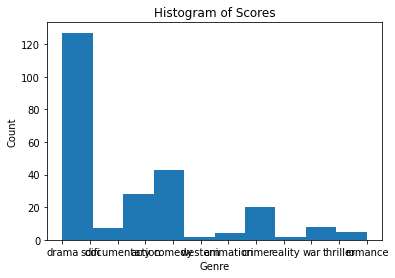

In [76]:
#Try the histogram again 
plt.hist(BestShows['MAIN_GENRE'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Histogram of Scores')

Text(0.5, 1.0, 'Histogram of Scores')

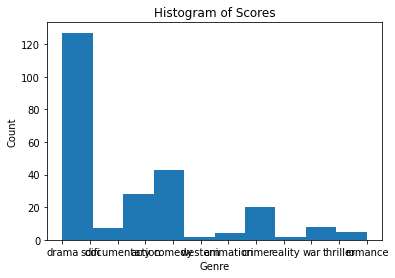

In [78]:
plt.hist(BestShows['MAIN_GENRE'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Histogram of Scores')

In [ ]:
#So we should zoom in to drama and the 7.5 rating
#It is skewed to the left

In [ ]:
#Exploring relationships

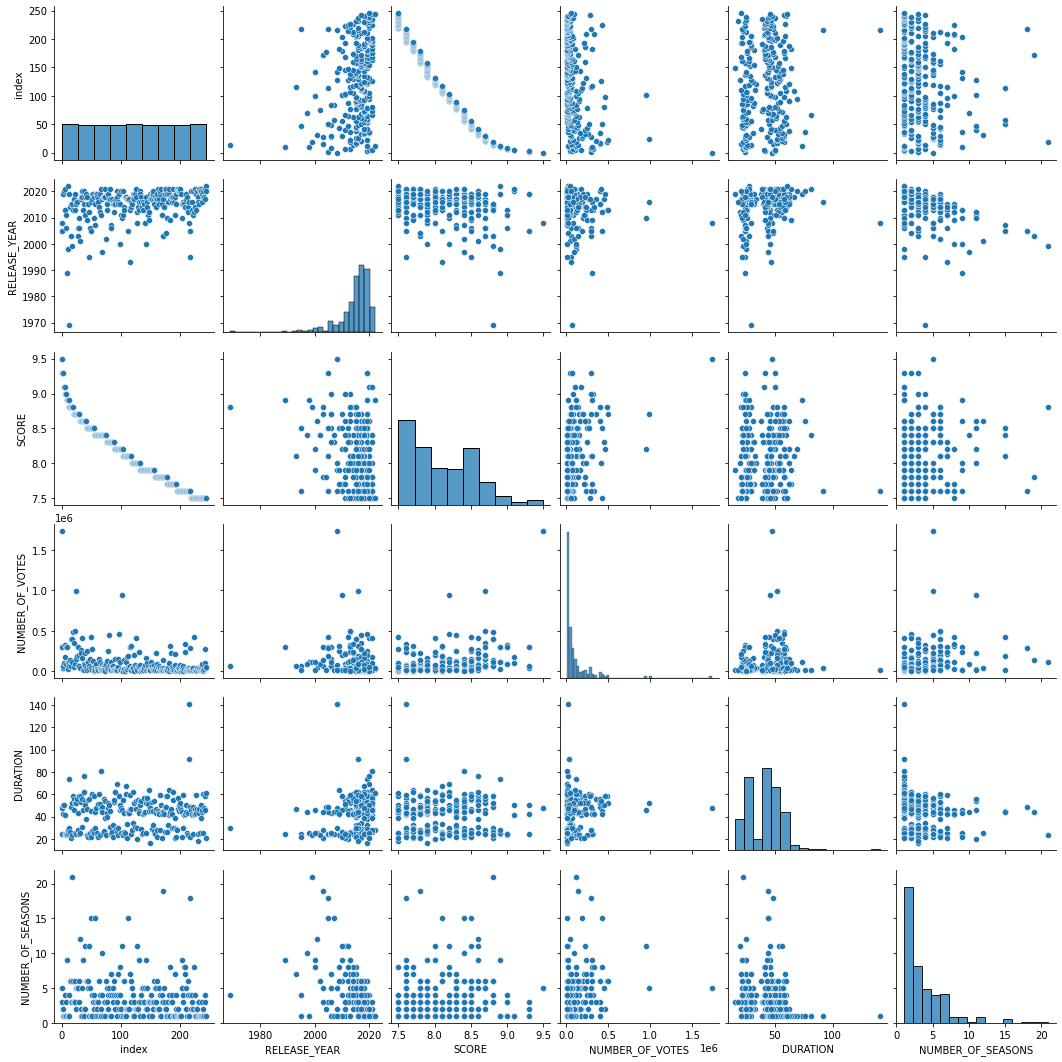

In [79]:
sns.pairplot(BestShows)

In [ ]:
#analyzing the pair plot from the score 

In [31]:
#the high the number of votes, the higher the score. So what gets a person to vote? 

In [32]:
#Let's see what a box plot between score and genre gets?

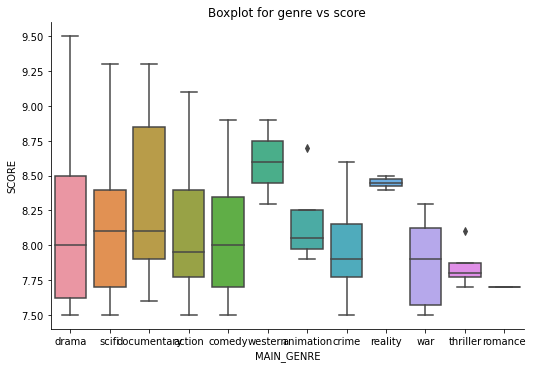

In [80]:
sns.catplot(x="MAIN_GENRE",  y='SCORE', data=BestShows, kind = 'box', aspect=1.5)
plt.title('Boxplot for genre vs score')
plt.show()

In [35]:
#The median score for weterns is much higher than all other genres
#The mediam score for thrillers is lower
#There are some outliers in animation and thriller


In [ ]:
#Exploring score and release date


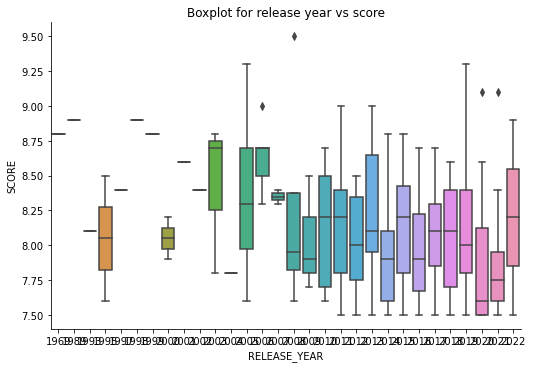

In [83]:
sns.catplot(x="RELEASE_YEAR",  y='SCORE', data=BestShows, kind = 'box', aspect=1.5)
plt.title('Boxplot for release year vs score')
plt.show()

In [39]:
#well, maybe this helps us see where the outliers are

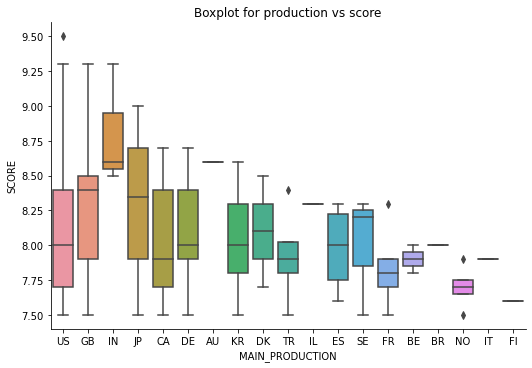

In [84]:
sns.catplot(x="MAIN_PRODUCTION",  y='SCORE', data=BestShows, kind = 'box', aspect=1.5)
plt.title('Boxplot for production vs score')
plt.show()

In [41]:
#Several production locations have higher relation to scores than productions in the united states

In [42]:
#What about a scatter plot?
#What about actors? 

In [49]:
#load in raw tiles csv
rawTitles = pd.read_csv("C:/Users/lesle/Desktop/raw_titles.csv")

In [50]:
#load in raw credits csv
rawCredits = pd.read_csv("C:/Users/lesle/Desktop/raw_credits.csv")

In [85]:
#joining tv shows and movies
rawTitles.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [86]:
rawCredits.head()

,index,person_id,id,name,character,role
0,0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [53]:
#create new dataframe that joins on 'id' 
#I definitely dont remember how to do that

In [54]:
actors = pd.merge(rawTitles, rawCredits, on='id')
actors.head()

,index_x,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,index_y,person_id,name,character,role
0,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,0,3748,Robert De Niro,Travis Bickle,ACTOR
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,1,14658,Jodie Foster,Iris Steensma,ACTOR
2,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,2,7064,Albert Brooks,Tom,ACTOR
3,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,3,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,4,48933,Cybill Shepherd,Betsy,ACTOR


In [56]:
#What about coding for the actor? what should we do here?

In [57]:
#Which actor has the highest score? let's try pivot tables. Ok, that doesn't work. 
#There might be a betterway to do this

In [58]:
pip install PivotTableJS

Note: you may need to restart the kernel to use updated packages.Collecting PivotTableJS



You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [59]:
from pivottablejs import pivot_ui

In [61]:
pivot_ui(BestMovies)

In [66]:
#this did not yield much - so I am going to switch gears a bit 
#Let's explore the score some more, especially since it is positively skewed
#Transforming Positively Skewed Data
#Go down from one, and the next two transformations (power 1/2 and 0) are meant to help with positively skewed data. The smaller the power and the farther away from one, the stronger the transformation.

In [67]:
#data transformation - changing the slope of the score (power 1/2 and 0)

In [88]:
BestShows['SCORE_SQRT'] = np.sqrt(BestShows['SCORE'])

<AxesSubplot: >

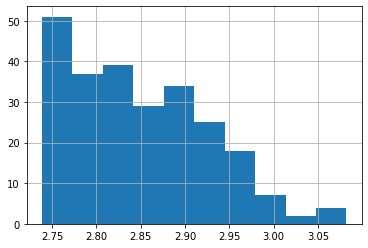

In [89]:
BestShows.SCORE_SQRT.hist()

In [90]:
#I don't even know what this is supposed to do, now. 

In [91]:
#Conclusion: There is not much correlation to work with here. There needs to be a change in the data set to best help with our central questions. 